# Fourier Transform Wave Divisor Function.

The wave divisor function consists of a pulse outline modulated with a high frequency component. The real solution of the wave divisor function is:

$$\large \Re(\sigma_{0})=\sum_{\mathbb{X}=2}^{\infty}\cos^{N} \left( \frac{\pi}{\mathbb{X}}x \right) \cos \left( \frac{N\pi}{\mathbb{X}}x  \right) $$

N is determined by the pulse width of $cos^{N}$ and calculated with ($L$ pulseheight at position $\Delta x$). N should be an positive even integer to obtain positive pulses only:

$$\large N(\mathbb{X}) \approx \lim_{\mathbb{X} \rightarrow \infty}     \frac{\log(L)}{\log \left(  \cos \left(  \frac {\pi}{\mathbb{X} } \Delta x  \right)      \right)} = - \frac{2 \mathbb{X}^2 \log(L)}{\pi^2 \Delta x^2} $$

The first term $cos^N$ can also be simplified, this is the pulse outline. The pulse outline forms a bell shaped distribution arround the origin for $\mathbb{X} \rightarrow \infty$:

$$\large O(x)=\lim_{\mathbb{X} \rightarrow \infty}\cos^{N} \left( \frac{\pi}{\mathbb{X}}x \right)= e^{a x^{2}}$$

$$\large a=\frac{\log(L) \space}{\Delta x^{2}}=constant$$

The high frequency component $HF(\mathbb{X})$ scales linear with $\mathbb{X}$ (see link for more information) for: $\mathbb{X} \rightarrow \infty$. 

$$\large HF(\mathbb{X})= \cos \left( \frac{N\pi}{\mathbb{X}} x \right) \approx \cos (b x)$$

$$\large b(\mathbb{X}) = \frac{N}{\mathbb{X}}\pi \approx \alpha \mathbb{X} = constant \cdot \mathbb{X}$$

So for $\mathbb{X} \rightarrow \infty$ the wave divisor function becomes:

$$\large \Re(\sigma_{0})\rightarrow \sum_{\mathbb{X}=2}^{\infty}e^{a x^{2}} \cos (b x) $$

The wave divisor at infinity can be Fourier transformed in the frequency domain. The following Fourier transform definitation was used:

$$\large \hat{f}(\xi)=\int_{-\infty}^{\infty}f(x) \space e^{-2 \pi ix \xi} \space dx$$

With help of Wolfram Alpha the Fourier transform is determined (see link below). The frequency spectra of an individual divisor wave will consist of a bell shape mirrored in the y-axis.

$$\large \hat{\sigma}_{0}(\xi)= \frac{\sqrt{\pi}}{2 \sqrt{-a}} \left( e^{(b-2  \pi  \xi)^{2} /4a}    + e^{(b+2 \pi \xi)^{2} /4a}       \right) $$

Every number will have at least on divisor wave. Because of the linearity properties of the Fourier transform we can sum the spectra to optain the complete spectra of a number. The simulation below shows the time domain wave and the frequency spectra. Also the wave has been transposed to an audible signal.

More information: [Wave Divisor Function][1], [Wiki Fourier Transform][2], [Wolfram Alpha][3]

[1]: https://mybinder.org/v2/gh/oooVincentooo/Shared/master?filepath=Wave%20Divisor%20Function%20rev%202.4.ipynb
[2]: https://en.wikipedia.org/wiki/Fourier_transform
[3]: https://www.wolframalpha.com/input/?i=Fourier+transform+exp%28a*x%5E2%29*cos%28b*x%29


In [1]:
import numpy as np
import matplotlib.pyplot as plt2
import ipywidgets as widgets

from operator import add
from IPython.display import Audio
from IPython.display import display

In [2]:
%matplotlib notebook

<IPython.core.display.Javascript object>


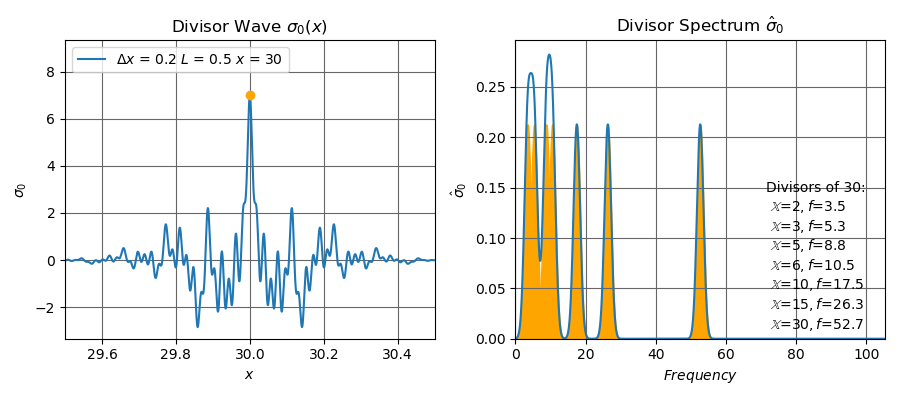

Options: L is pulse height at dx, Audio is from Real Part.
Orange dot in Wave graph indicates divisor count of: x
Blue line in spectrum indicates total spectrum


interactive(children=(Dropdown(description='$\\Delta x$:', index=2, options=(0.1, 0.15, 0.2, 0.25, 0.3, 0.35, …

In [23]:
x2 = np.linspace(0, 101, 400002)
fig, ax2= plt2.subplots(1,2, figsize=(9, 4))
    
def update_plot(dx2, L2, sx):

    #Set x range (x-0.5)<x<(x+0.5)
    xf=x2[int(400002*(sx-0.5)/101):int(400002*(sx+0.5)/101)]
    
    ax2[0].clear()
    ax2[1].clear()
    
    reD=[0]*400002
    #imD=[0]*400002
    
    #Create list with waves X=2 to X=100
    wave2=list(range(2,101))
    
    #Calculate Solution Wave Devisor Function
    for w2 in wave2:
  
        #N2=-2*(w2**2)*np.log(L2)/((np.pi**2)*(dx2**2))
        N2=(np.log(L2))/(np.log(np.cos(np.pi*dx2/w2)))
        N2=2*round(0.5*N2,0)
        
        reDw = ((np.cos(xf*np.pi/w2))**N2)*(np.cos(np.pi*N2*xf/w2))
        #imDw = (-(np.cos(xf*np.pi/w2))**N2)*(np.sin(np.pi*N2*xf/w2))

        reD=list(map(add, reD, reDw))
        #imD=list(map(add, imD, imDw))

    #Determine maximum Divisor Count
    countD=max(reD)

    #Plot Divisor Function
    units2 = '$\Delta x$ = {} $L$ = {} $x$ = {}'
    ax2[0].plot(xf, reD,color='#1f77b4', label=units2.format(dx2, L2, sx))
    ax2[0].plot([sx],[countD], color='orange', marker='o')
    ax2[0].legend(loc=2)
    ax2[0].set_title('Divisor Wave $\sigma_{0}(x)$')
    ax2[0].set_xlabel('$x$')
    ax2[0].set_ylabel('$\sigma_{0}$')
    ax2[0].axis([(sx-0.5), (sx+0.5), None,(countD+countD/3)])
    ax2[0].grid(b=True, which='major', color='#666666', linestyle='-')
 
    #Calculate Fourier Transform.
    ampliS=[0]*10000
    
    #Maximum Frequency Range
    N2=-2*(sx**2)*np.log(L2)/((np.pi**2)*(dx2**2))
    N2=2*round(0.5*N2,0)
    fmax=N2/sx
    frange=np.linspace(-fmax,fmax,10000)

    #Fourier Transform Calculated
    lab='Divisors of ' + str(sx) +':'
    for w2 in wave2:
 
        #Determine coeficients: a, b calculate Fourier Transform.
        N2=(np.log(L2))/(np.log(np.cos(np.pi*dx2/w2)))
        N2=2*round(0.5*N2,0)
        a=np.log(L2)/(dx2**2)
        b=np.pi*N2/w2
        
        #Only add waves from divisors of x.
        if (sx%w2)==0:
            Spec = (np.sqrt(np.pi))/(2*np.sqrt(-a))*(np.exp(((b-2*np.pi*frange)**2)/(4*a)) + np.exp(((b+2*np.pi*frange)**2)/(4*a)))
            ampliS=list(map(add, ampliS, Spec))
            lab=lab+'\n $\mathbb{X}$='+str(w2) + '$, f$='+str(np.round(0.5*N2/w2,1)) 
            
            #Plot individual divisor frequencies
            ax2[1].fill_between(frange,Spec, color='orange')

    #Plot summation frequencies.
    ax2[1].set_title('Divisor Spectrum $\hat{\sigma}_{0}$')
    ax2[1].annotate(lab, xy=(fmax-fmax/3.1,0.01))
    ax2[1].plot(frange, ampliS,color='#1f77b4')
    ax2[1].set_xlabel('$Frequency$')
    ax2[1].set_ylabel('$\hat{\sigma}_{0}$')
    ax2[1].axis([0,fmax, 0,None]) 
    ax2[1].grid(b=True, which='major', color='#666666', linestyle='-')
    
    plt2.tight_layout()
    plt2.show()
    
    #Create Audiofile
    display(Audio(reD, rate=30000))

print('Options: L is pulse height at dx, Audio is from Real Part.')
print('Orange dot in Wave graph indicates divisor count of: x')
print('Blue line in spectrum indicates total spectrum')

dx2 = widgets.Dropdown(options=[0.10,0.15, 0.20,0.25,0.30,0.35,0.40,0.45,0.5], value=0.2, description='$\Delta x$:')  
L2 = widgets.Dropdown(options=[0.10,0.15, 0.20,0.25,0.30,0.35,0.40,0.45,0.5], value=0.5, description='$L$:') 
sx = widgets.Dropdown(options=list(range(2,101)), description='$x$:',value=30)   

widgets.interactive(update_plot, dx2=dx2, L2=L2, sx=sx)